## Quantum Fourier Transform and its Inverse

### 1.Initialize

In [7]:
from funcs import *
from qiskit.circuit import ClassicalRegister
import math

In [8]:
n = 4
init_state = '1000'
qc = QuantumCircuit(4)
for i in range(n):
    if init_state[i] == '1':
        qc.x(i)
qc.barrier()


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 2), Qubit(QuantumRegister(4, 'q'), 3)), clbits=())

### 2.Quantum Fourier Transform

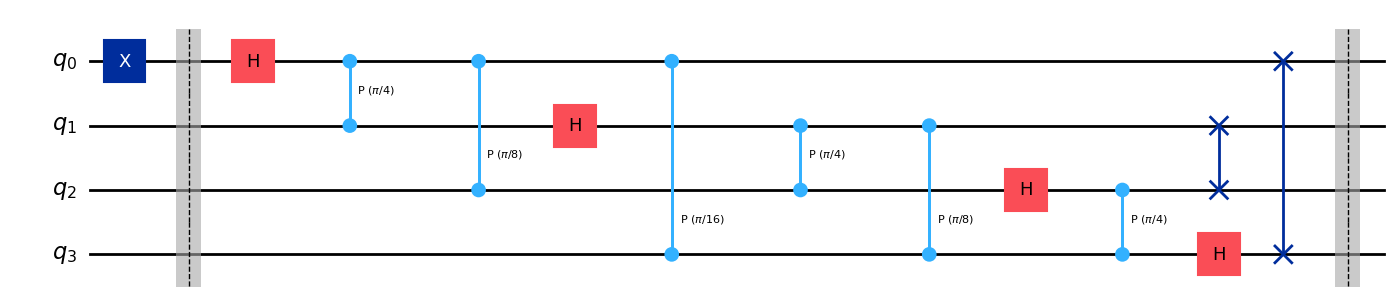

In [9]:
for i in range(n-1):
    qc.h(i)
    for j in range(i+1, n):
        qc.cp(math.pi/2**(j-i+1), j, i)
qc.h(n-1)
for i in range(n//2):
    qc.swap(i, n-1-i)
qc.barrier()
qc.draw(output='mpl')

### 3.Inverse QFT

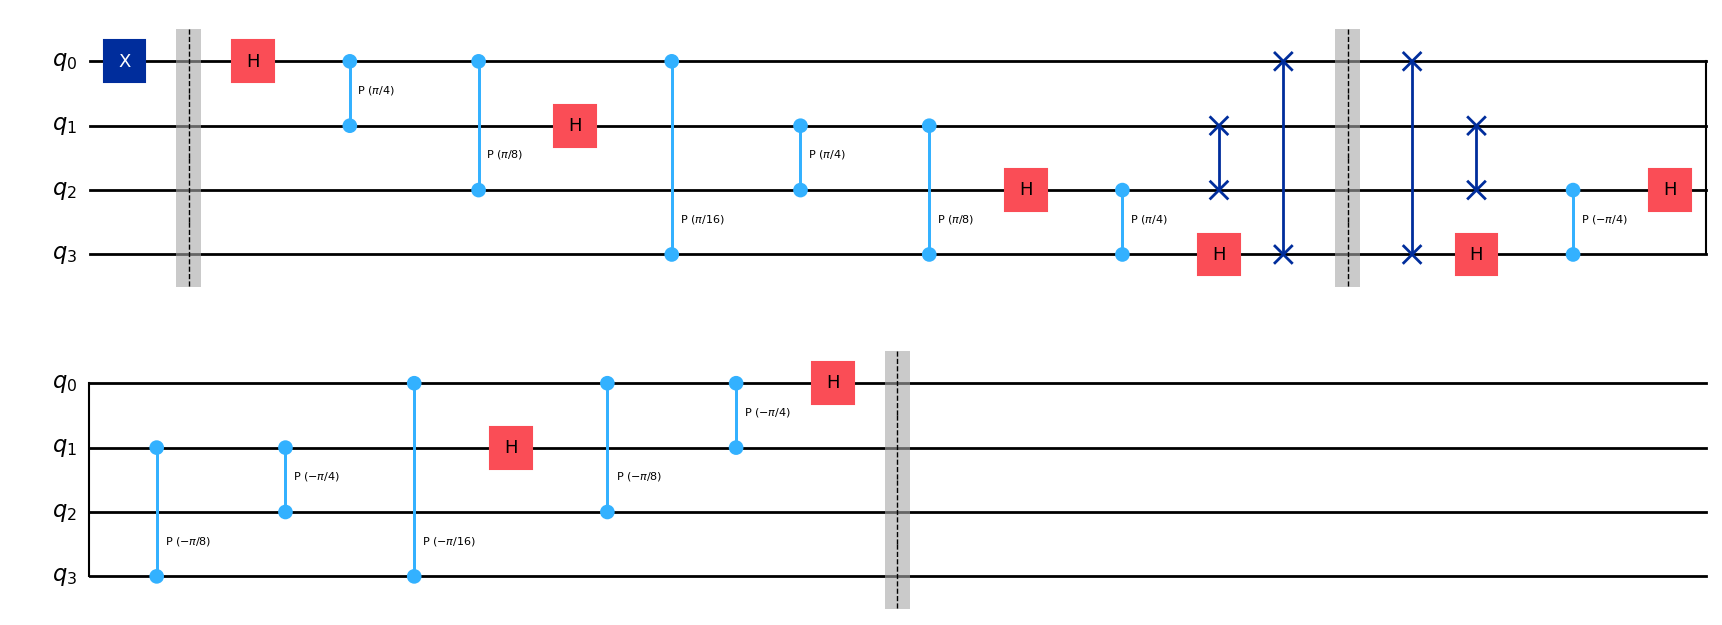

In [10]:
for i in range(n//2):
    qc.swap(i, n-i-1)
for i in range(n-1, -1, -1):
    for j in range(n-1, i, -1):
        qc.cp(-2*math.pi/2**(j-i+2), j, i)
    qc.h(i)
qc.barrier()
qc.draw(output='mpl')

### 4.Test

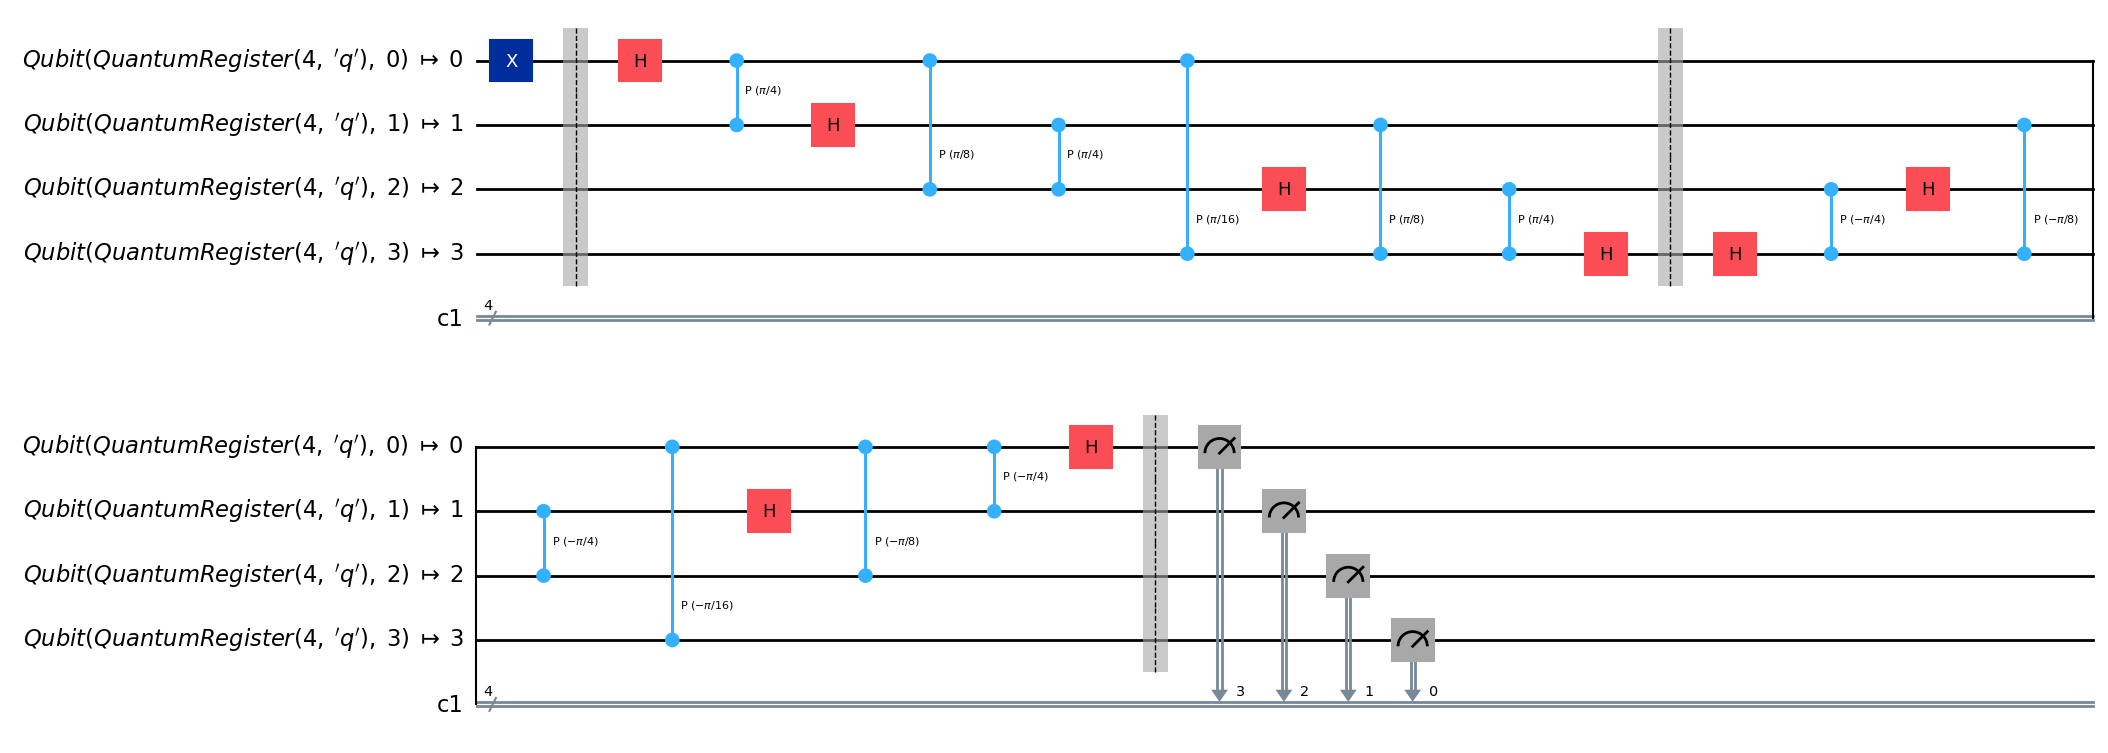

In [11]:
qc = transpile(qc, backend=AerSimulator(), optimization_level=3)
# this transpile will just swallow your swap gates in level>=2, be careful
c = ClassicalRegister(n)
qc.add_register(c)
for i in range(n):
    qc.measure(i, c[n-i-1])
# I get swaps back by reverse results, any swap gates will be swallowed by transpile(level>=2).
qc.draw(output='mpl')

In [12]:
results = execute_qc(qc)

print('original state: ', init_state)
max_key = max(results, key=results.get)
print('results:        ', max_key)

original state:  1000
results:         1000
